# Phase 3: Predictive Modeling

This notebook demonstrates the process of building and evaluating predictive models using the cleaned online retail dataset. Each step is explained with comments and visualizations for clarity.

## 1. Import Required Libraries

We use pandas, numpy, matplotlib, seaborn, and requests (for API integration).

In [1]:
# Import essential libraries for data science and visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization
import requests  # For API integration
# Set visualization style for consistency
sns.set(style='whitegrid')

## 2. Load and Prepare Data

We load the cleaned dataset and perform basic checks.

In [2]:
# Load the cleaned retail data from Phase 1
data_path = '../Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv'
df = pd.read_csv(data_path)
# Display the first few rows to understand the data structure
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [3]:
# Check for missing values and data types
print('DataFrame info:')
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      797885 non-null  object 
 1   stockcode    797885 non-null  object 
 2   description  797885 non-null  object 
 3   quantity     797885 non-null  int64  
 4   invoicedate  797885 non-null  object 
 5   price        797885 non-null  float64
 6   customer_id  797885 non-null  int64  
 7   country      797885 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 48.7+ MB

Missing values per column:
invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64


## 3. Feature Engineering

We create new features that may help improve model performance.

In [4]:
# Feature Engineering: Create new features for modeling
df['TotalPrice'] = df['quantity'] * df['price']  # Total price for each transaction
df['invoicedate'] = pd.to_datetime(df['invoicedate'])  # Ensure datetime type
df['InvoiceMonth'] = df['invoicedate'].dt.month  # Extract month
df['InvoiceDay'] = df['invoicedate'].dt.day      # Extract day
df['InvoiceHour'] = df['invoicedate'].dt.hour    # Extract hour
# Preview the updated dataframe
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,1,7


## 4. Model Selection and Training

We select a simple regression model to predict 'TotalPrice'.

In [5]:
# Prepare features and target variable
features = ['quantity', 'price', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']
X = df[features]
y = df['TotalPrice']
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a Linear Regression model to predict TotalPrice
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)

## 5. Model Evaluation

We evaluate the model using standard regression metrics and visualize the results.

In [7]:
# Calculate evaluation metrics for regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

MSE: 25363.24, MAE: 15.98, R2: 0.56


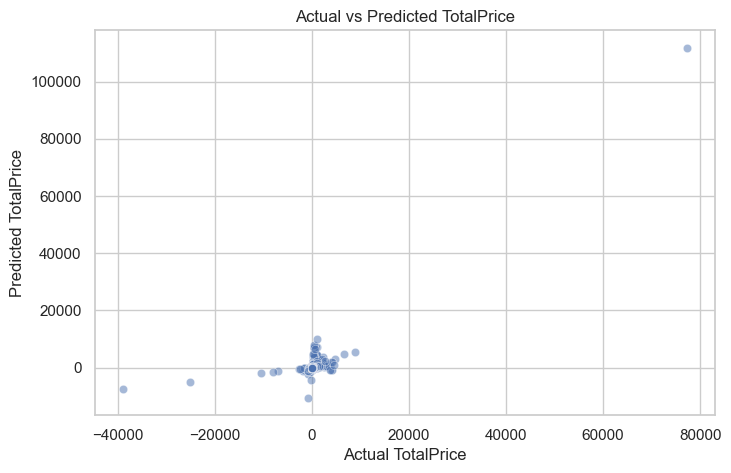

In [8]:
# Visualize actual vs predicted TotalPrice values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Actual vs Predicted TotalPrice')
plt.show()

## 6. Interpretation and Visualization

We interpret the model coefficients and visualize feature importance.

Feature Coefficients:
quantity        1.506815
price          -0.196405
InvoiceMonth    0.233253
InvoiceDay     -0.002899
InvoiceHour    -0.224634
dtype: float64


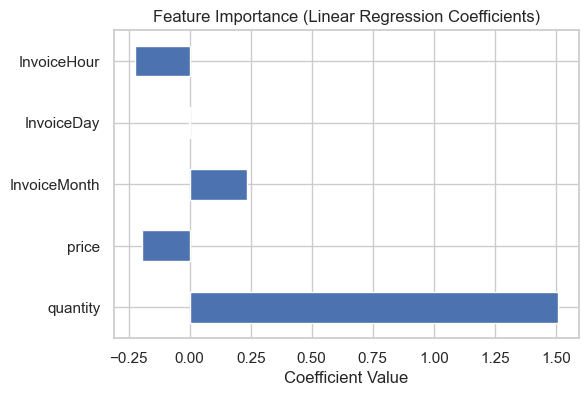

In [9]:
# Show model coefficients for each feature to interpret importance
coefficients = pd.Series(model.coef_, index=features)
print('Feature Coefficients:')
print(coefficients)
# Visualize feature importance
plt.figure(figsize=(6,4))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

## 7. API Integration Example

Demonstrate using the `requests` library to fetch data from an external API.

In [10]:
# Example: Fetch data from a public API (e.g., exchange rates) using requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
if response.status_code == 200:
    data = response.json()
    print('Exchange rates for USD:')
    print(data['rates'])
else:
    print('Failed to fetch data from API')

Exchange rates for USD:
{'USD': 1, 'AED': 3.67, 'AFN': 68.76, 'ALL': 83.42, 'AMD': 382.55, 'ANG': 1.79, 'AOA': 919.67, 'ARS': 1321.58, 'AUD': 1.55, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.67, 'BBD': 2, 'BDT': 121.61, 'BGN': 1.68, 'BHD': 0.376, 'BIF': 2966.7, 'BMD': 1, 'BND': 1.28, 'BOB': 6.92, 'BRL': 5.47, 'BSD': 1, 'BTN': 87.42, 'BWP': 13.81, 'BYN': 3.1, 'BZD': 2, 'CAD': 1.39, 'CDF': 2862.08, 'CHF': 0.804, 'CLP': 969.51, 'CNY': 7.17, 'COP': 4024.51, 'CRC': 504.89, 'CUP': 24, 'CVE': 94.4, 'CZK': 21.08, 'DJF': 177.72, 'DKK': 6.38, 'DOP': 62.03, 'DZD': 129.91, 'EGP': 48.49, 'ERN': 15, 'ETB': 140.85, 'EUR': 0.856, 'FJD': 2.28, 'FKP': 0.741, 'FOK': 6.38, 'GBP': 0.741, 'GEL': 2.7, 'GGP': 0.741, 'GHS': 11.63, 'GIP': 0.741, 'GMD': 72.87, 'GNF': 8681.32, 'GTQ': 7.66, 'GYD': 209.11, 'HKD': 7.82, 'HNL': 26.16, 'HRK': 6.45, 'HTG': 130.83, 'HUF': 339.63, 'IDR': 16299.36, 'ILS': 3.39, 'IMP': 0.741, 'INR': 87.42, 'IQD': 1309.81, 'IRR': 42199.14, 'ISK': 123.57, 'JEP': 0.741, 'JMD': 160.12, 'JOD': 0.709, 'J

## Enhanced Data Visualizations

Below are additional visualizations to better understand the data and model results. All use only matplotlib and seaborn for styling.

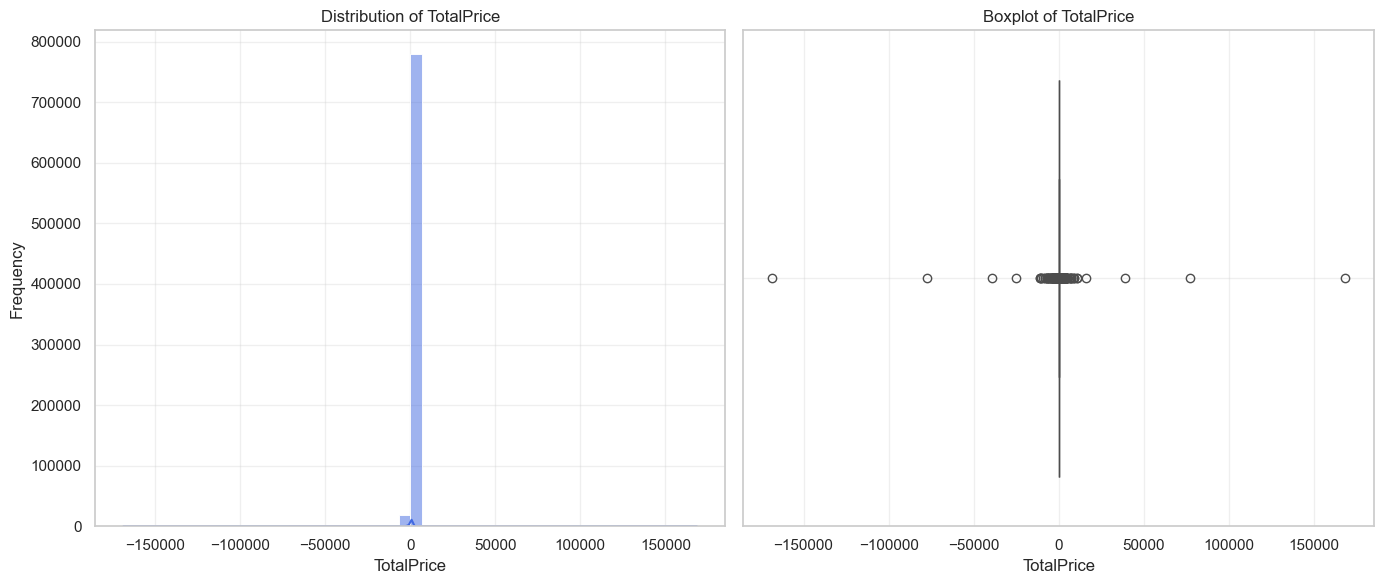

In [11]:
# Distribution of TotalPrice (Histogram and Boxplot)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df['TotalPrice'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.subplot(1,2,2)
sns.boxplot(x=df['TotalPrice'], color='orange')
plt.title('Boxplot of TotalPrice')
plt.xlabel('TotalPrice')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

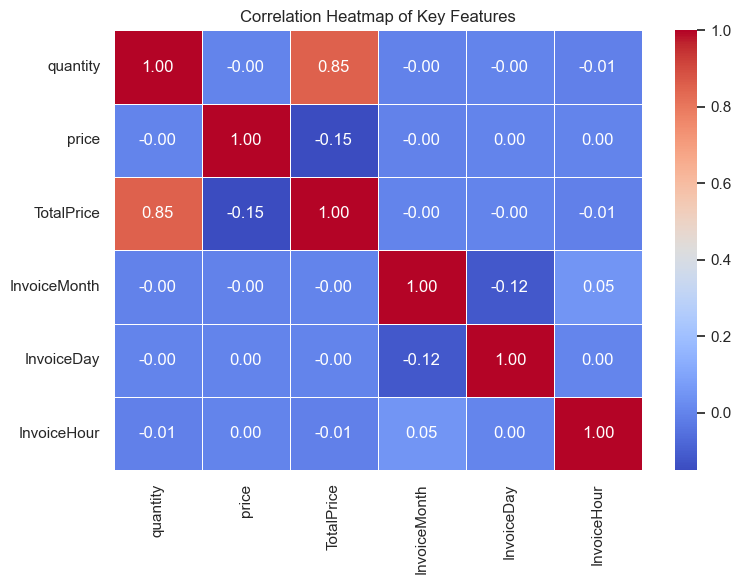

In [12]:
# Correlation heatmap of main numerical features
plt.figure(figsize=(8,6))
corr = df[['quantity', 'price', 'TotalPrice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

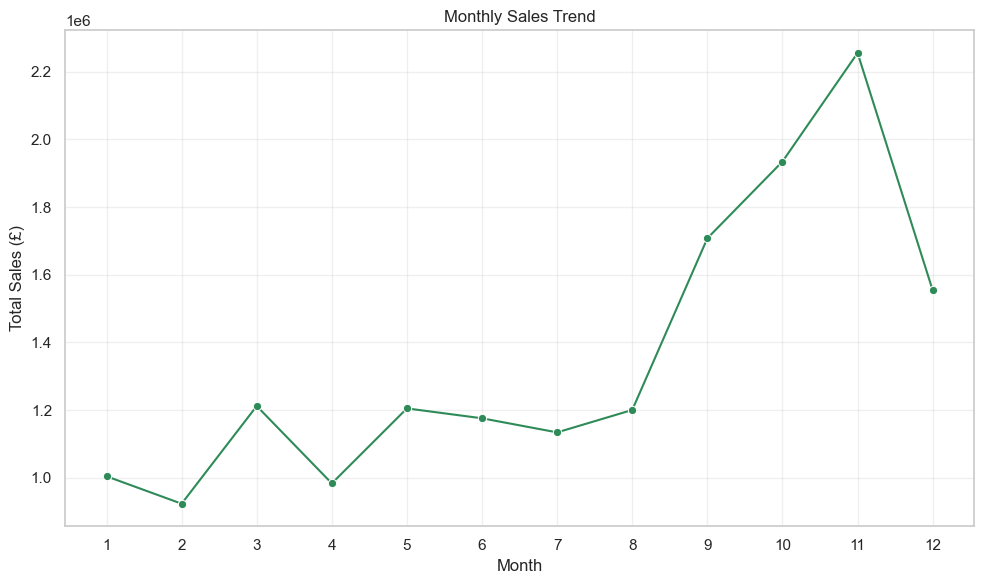

In [13]:
# Monthly sales trend line plot
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_sales, marker='o', color='seagreen')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

C:\Users\dilsh\AppData\Local\Temp\ipykernel_14592\1168223270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transactions['TotalPrice'], y=top_transactions.index, palette='mako')


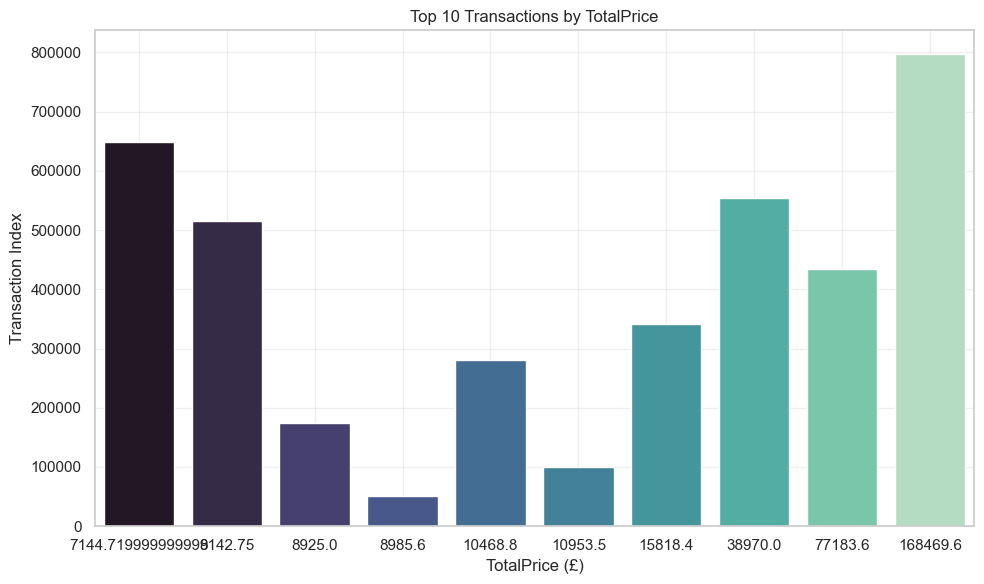

In [14]:
# Top 10 transactions by TotalPrice (bar plot)
top_transactions = df.nlargest(10, 'TotalPrice')
plt.figure(figsize=(10,6))
sns.barplot(x=top_transactions['TotalPrice'], y=top_transactions.index, palette='mako')
plt.title('Top 10 Transactions by TotalPrice')
plt.xlabel('TotalPrice (£)')
plt.ylabel('Transaction Index')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()